## Import Libraries

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Define Model Architeclure

In [26]:
# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    #layers.Dense(4, activation='softmax')  # Assuming 4 classes: banana, cassava, maize, weed
    layers.Dense(4, activation='linear')  # Replace 'softmax' with 'linear'
])


## Compile the Model

In [27]:

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Load the image data and preprocess it
image_size = (64, 64)  # Adjust the image size according to your requirements
batch_size = 10  # Adjust the batch size as per your resources and dataset size
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data\known_images',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data\known_images',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

Found 133 files belonging to 4 classes.
Using 107 files for training.
Found 133 files belonging to 4 classes.
Using 26 files for validation.


## Train the Model

In [28]:
# Train the model
epochs = 20  # Adjust the number of epochs based on your dataset
hist = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
11/11 [==============================] - 1s 34ms/step - loss: 34.5194 - accuracy: 0.4019 - val_loss: 3.1221 - val_accuracy: 0.3462
Epoch 2/20
11/11 [==============================] - 0s 26ms/step - loss: 1.5502 - accuracy: 0.4299 - val_loss: 1.1745 - val_accuracy: 0.3846
Epoch 3/20
11/11 [==============================] - 0s 27ms/step - loss: 0.9591 - accuracy: 0.6168 - val_loss: 0.7674 - val_accuracy: 0.6538
Epoch 4/20
11/11 [==============================] - 0s 26ms/step - loss: 0.5646 - accuracy: 0.7850 - val_loss: 1.4145 - val_accuracy: 0.4231
Epoch 5/20
11/11 [==============================] - 0s 26ms/step - loss: 0.4565 - accuracy: 0.8131 - val_loss: 0.7272 - val_accuracy: 0.6923
Epoch 6/20
11/11 [==============================] - 0s 27ms/step - loss: 0.2883 - accuracy: 0.8785 - val_loss: 0.4896 - val_accuracy: 0.8077
Epoch 7/20
11/11 [==============================] - 0s 27ms/step - loss: 0.1446 - accuracy: 0.9533 - val_loss: 0.5271 - val_accuracy: 0.8462
Epoch 8/20
1

In [29]:
# Save the model for future use
model.save('saved-model')

INFO:tensorflow:Assets written to: saved-model\assets


## Plot Model Performance

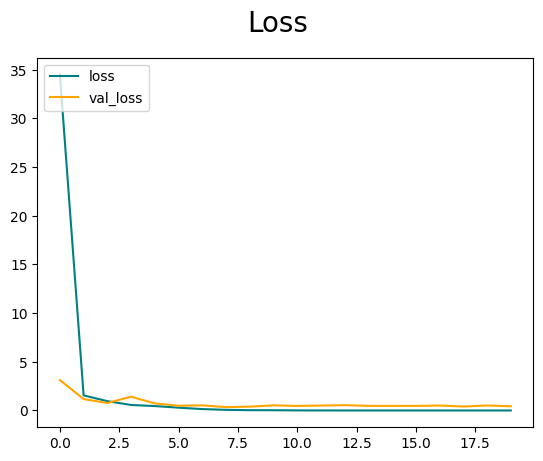

In [30]:
from matplotlib import pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## plot Accuracy

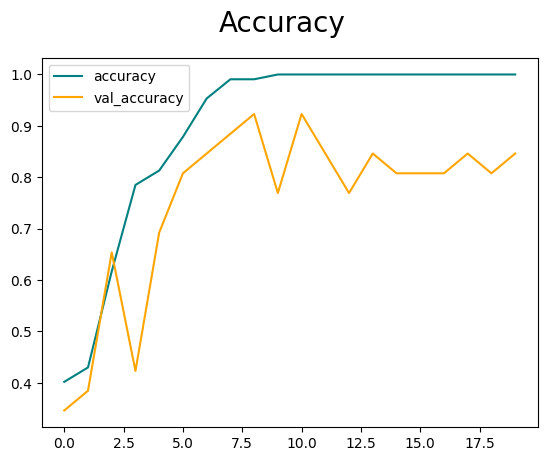

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate the Model

In [32]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score

# Assuming you have a test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/known_images',
    image_size=image_size,
    batch_size=batch_size
)

# Make predictions on the test dataset
predictions = model.predict(test_ds)
y_pred = np.argmax(predictions, axis=1)  # Convert from one-hot to integer labels

# Get the true labels from the test dataset
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print("F1 Score: {:.2f}".format(f1))

# Calculate recall
recall = recall_score(y_true, y_pred, average='weighted')
print("Recall: {:.2f}".format(recall))

# Generate classification report
class_names = train_ds.class_names  # Get the class names from the training dataset
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:")
print(report)


Found 133 files belonging to 4 classes.
Accuracy: 30.08%
F1 Score: 0.30
Recall: 0.30
Classification Report:
              precision    recall  f1-score   support

      banana       0.13      0.13      0.13        23
     cassava       0.51      0.51      0.51        55
       maize       0.12      0.12      0.12        34
        weed       0.22      0.24      0.23        21

    accuracy                           0.30       133
   macro avg       0.25      0.25      0.25       133
weighted avg       0.30      0.30      0.30       133



Found 24 files belonging to 4 classes.


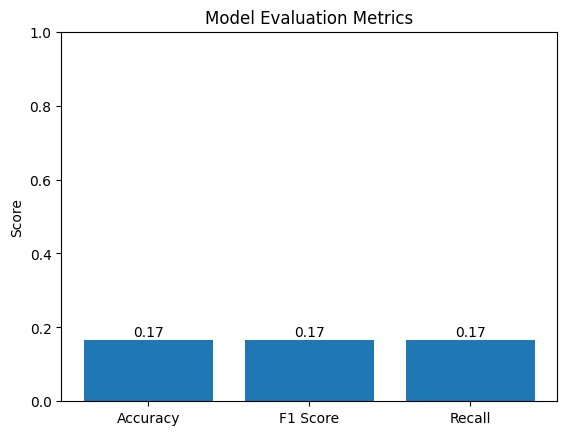

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score

# Assuming you have a test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/test_images',
    image_size=image_size,
    batch_size=batch_size
)

# Make predictions on the test dataset
predictions = model.predict(test_ds)
y_pred = np.argmax(predictions, axis=1)  # Convert from one-hot to integer labels

# Get the true labels from the test dataset
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Calculate accuracy, F1 score, and recall
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

# Create a bar graph
metrics = ['Accuracy', 'F1 Score', 'Recall']
values = [accuracy, f1, recall]

plt.bar(metrics, values)
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)  # Set the y-axis limits to range from 0 to 1

# Add labels to the bars
for i, value in enumerate(values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()
